In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.optimizers import SGD
import keras.utils
import keras.backend as K
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


print(K.tensorflow_backend._get_available_gpus())
print('img data fmt: ', K.image_data_format())

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']
img data fmt:  channels_last


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train.shape = ', X_train.shape, ' y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, ' y_test.shape = ', y_test.shape)

print('data type: ', type(X_train[0][0][0][0]))
print('label type: ', type(y_train[0][0]))

X_train.shape =  (50000, 32, 32, 3)  y_train.shape =  (50000, 1)
X_test.shape =  (10000, 32, 32, 3)  y_test.shape =  (10000, 1)
data type:  <class 'numpy.uint8'>
label type:  <class 'numpy.uint8'>


In [3]:
# Reshape data and normalize between [0.0 , 1.0] before feeding it to our model

#X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
#X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
# convert target labels from scalars to an array of binary values
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# convert img data from ints in range [0,255] to floats in range [0,1] 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

print('X_train.shape = ', X_train.shape, ' y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, ' y_test.shape = ', y_test.shape)

# check the type of the first element in our 4-D array
print('data type: ', type(X_train[0][0][0][0])) 
print('label type: ', type(y_train[0][0]))

X_train.shape =  (50000, 32, 32, 3)  y_train.shape =  (50000, 10)
X_test.shape =  (10000, 32, 32, 3)  y_test.shape =  (10000, 10)
data type:  <class 'numpy.float32'>
label type:  <class 'numpy.float32'>


# MultiLayer Perceptron (MLP)

* 4 fully connected (dense) layers
    * 1 input layer (784,)
    * 2 hidden layers (128,) ReLU
    * 1 output layer (10,) softmax
    
Outputs probability for each class

In [4]:
# create an empty sequential model
model = Sequential()

# add layers
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Stochastic Gradient Descent (SGD) optimizer
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)

# Compile the model - this is where memory is allocated and a compute graph is generated
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# print out a summary of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [5]:
# if you get a ResourceExhaustedError, decrease the batch_size
hist = model.fit(X_train, y_train, epochs=10, batch_size=64)
# model.fit() returns a history object, which is a dict containing loss and acc metrics (and any other metrics we pass in)

Epoch 1/10
50000/50000 [==============================] - 3s 55us/step - loss: 1.8638 - acc: 0.3237
Epoch 2/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.6842 - acc: 0.3963
Epoch 3/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.6032 - acc: 0.4264
Epoch 4/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.5537 - acc: 0.4431
Epoch 5/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.5176 - acc: 0.4539
Epoch 6/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.4823 - acc: 0.4698
Epoch 7/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.4567 - acc: 0.4786
Epoch 8/10
50000/50000 [==============================] - 2s 48us/step - loss: 1.4277 - acc: 0.4853
Epoch 9/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.4086 - acc: 0.4966
Epoch 10/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.3902 - acc: 0.5008

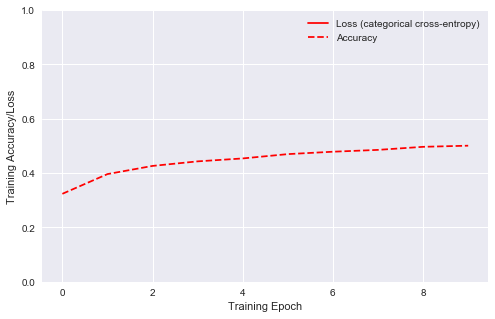

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(8,5)) # figsize is in inches
# plot the history object returned by the fit() method
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['acc'], 'r--')
plt.xlabel('Training Epoch')
plt.ylabel('Training Accuracy/Loss')
plt.legend(['Loss (categorical cross-entropy)', 'Accuracy'])
plt.grid(True)
plt.ylim(0,1)
plt.show()


In [7]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=128)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

10000/10000 [==============================] - 0s 29us/step
test loss:  1.4396803703308105
test accuracy:  0.4872


# Convolutional Neural Net

 * 2 Convolutional Layers
 * 2 Max-Pooling Layers
 * 2 Fully-Connected layers
 
 in $\rightarrow$ Conv2d $\rightarrow$ Max Pooling $\rightarrow$ Conv2d $\rightarrow$ Max Pooling $\rightarrow$ Fully Connected $\rightarrow$ out

In [8]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),
               activation='relu',
               input_shape= (32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)

cnn.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=sgd,
            metrics=['accuracy'])

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

In [9]:

hist_cnn = cnn.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 5s 95us/step - loss: 1.7140 - acc: 0.3745
Epoch 2/10
50000/50000 [==============================] - 4s 79us/step - loss: 1.2461 - acc: 0.5584
Epoch 3/10
50000/50000 [==============================] - 4s 77us/step - loss: 1.0457 - acc: 0.6344
Epoch 4/10
50000/50000 [==============================] - 4s 77us/step - loss: 0.9230 - acc: 0.6789
Epoch 5/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.8259 - acc: 0.7120
Epoch 6/10
50000/50000 [==============================] - 4s 79us/step - loss: 0.7240 - acc: 0.7484
Epoch 7/10
50000/50000 [==============================] - 4s 79us/step - loss: 0.6445 - acc: 0.7756
Epoch 8/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.5534 - acc: 0.8069
Epoch 9/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.4824 - acc: 0.8309
Epoch 10/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.4025 - acc: 0.8588

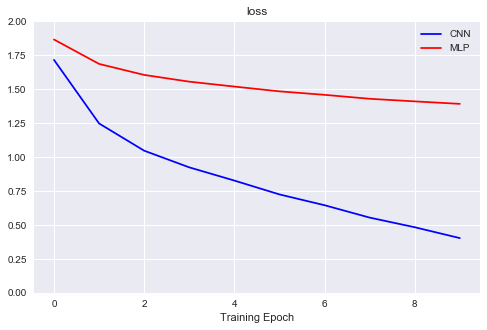

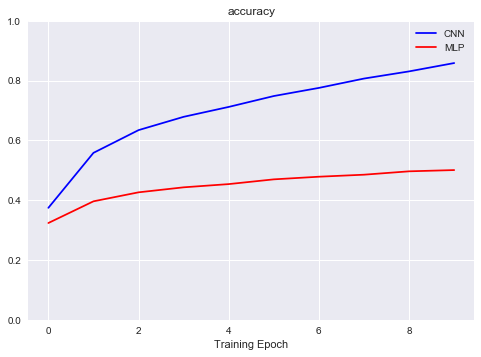

In [10]:
plt.figure(figsize=(8,5))
#plt.plot(hist.history['loss'], 'r')
#plt.plot(hist.history['acc'], 'r--')
plt.plot(hist_cnn.history['loss'], 'b')
plt.plot(hist.history['loss'], 'r')
plt.legend(['CNN', 'MLP'])
plt.xlabel('Training Epoch')
plt.grid(True)
plt.ylim(0,2)
plt.title('loss')
plt.show()
plt.plot(hist_cnn.history['acc'], 'b')
plt.plot(hist.history['acc'], 'r')
plt.legend(['CNN', 'MLP'])
plt.xlabel('Training Epoch')
plt.grid(True)
plt.ylim(0,1)
plt.title('accuracy')
#plt.savefig('MNIST_cnn_mlp.png', dpi=150, bbox_inches='tight')
plt.show() # if you call plt.savefig() after plt.show(), you'll save a blank figure

In [11]:
loss, accuracy = cnn.evaluate(X_test, y_test, batch_size=128)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

10000/10000 [==============================] - 0s 43us/step
test loss:  1.0734603885650635
test accuracy:  0.6914
